In [38]:
import csv
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, Cropping2D, AveragePooling2D, Activation, Lambda
%matplotlib inline



In [39]:
FILE_PREFIX = 'driving_records/data/'
lines = []
with open(FILE_PREFIX + 'driving_log.csv') as csv_file:
    reader = csv.reader(csv_file)
    for line in reader:
        lines.append(line)
print(len(lines))
print(lines[0])
print(lines[1])

8037
['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
['IMG/center_2016_12_01_13_30_48_287.jpg', ' IMG/left_2016_12_01_13_30_48_287.jpg', ' IMG/right_2016_12_01_13_30_48_287.jpg', ' 0', ' 0', ' 0', ' 22.14829']


In [41]:
images = []
steering = []
for line in lines[1:]:
    steering.append(float(line[3]))
    image = cv2.imread(FILE_PREFIX + line[0])
    images.append(image)
    steering.append(-float(line[3]))
    reversed_image = image[:,::-1,:]
    images.append(reversed_image)

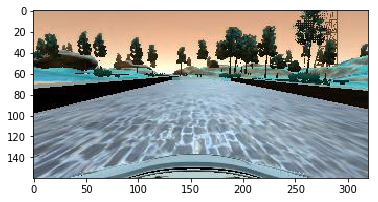

In [42]:
plt.imshow(images[0],cmap='gray')
plt.show()

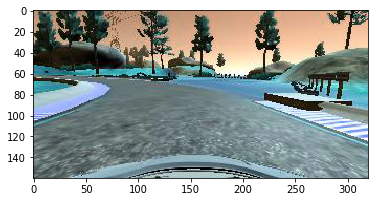

In [44]:
plt.imshow(images[6],cmap='gray')
plt.show()

In [49]:
X_train = np.array(images)
y_train = np.array(steering)

model = Sequential()
model.add(Cropping2D(cropping=((60, 0),(0, 0)), input_shape=(160, 320, 3)))
model.add(Lambda(lambda x: (x / 255.0) - 0.5))
model.add(Dropout(0.2))
model.add(AveragePooling2D(pool_size=(1, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 7), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 7), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(5, 7), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Conv2D(filters=256, kernel_size=(3, 5), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_6 (Cropping2D)    (None, 100, 320, 3)       0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 100, 320, 3)       0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 100, 320, 3)       0         
_________________________________________________________________
average_pooling2d_5 (Average (None, 100, 160, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 96, 154, 32)       3392      
_________________________________________________________________
dropout_26 (Dropout)         (None, 96, 154, 32)       0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 77, 32)        0         
__________

In [50]:
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=4, batch_size=64) 
model.save('model.h5')

Train on 12857 samples, validate on 3215 samples
Epoch 1/4
12857/12857 [==============================] - 688s 54ms/step - loss: 0.0133 - val_loss: 0.0113
Epoch 2/4
12857/12857 [==============================] - 683s 53ms/step - loss: 0.0099 - val_loss: 0.0102
Epoch 3/4
12857/12857 [==============================] - 696s 54ms/step - loss: 0.0094 - val_loss: 0.0101
Epoch 4/4
12857/12857 [==============================] - 708s 55ms/step - loss: 0.0094 - val_loss: 0.0103


In [51]:
print(y_train[100:120])
model.predict(X_train[100:120])

[ 0.         -0.          0.0617599  -0.0617599   0.05219137 -0.05219137
  0.05219137 -0.05219137  0.3679529  -0.3679529   0.5784606  -0.5784606
  0.5784606  -0.5784606   0.1670138  -0.1670138   0.         -0.          0.
 -0.        ]


array([[ 0.03196137],
       [-0.03728038],
       [ 0.03496774],
       [-0.03795316],
       [ 0.0395334 ],
       [-0.03957328],
       [ 0.04139743],
       [-0.04041287],
       [ 0.03936627],
       [-0.03986594],
       [ 0.0313044 ],
       [-0.03537641],
       [ 0.02270121],
       [-0.028854  ],
       [ 0.01120026],
       [-0.02216201],
       [ 0.00302572],
       [-0.01440778],
       [ 0.00110416],
       [-0.01294064]], dtype=float32)

In [52]:
# print(np.sum(X_train[2000] - X_train[2050]))
predictions = np.array(model.predict(X_train[0:1000]))
r = predictions[0]
sum_r = 0
for i in range(len(predictions)):
    sum_r += abs(predictions[i] - r)
print(sum_r)

[ 30.26016426]


In [36]:
print(len(predictions))
print(sum_r)

16072
[ 0.]
